1. **Importing Libraries**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential

**2. Acquiring data**

In [69]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**3.Data Visualization**

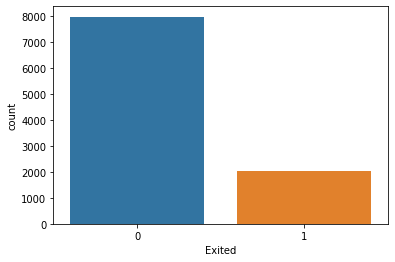

In [70]:
sns.countplot(x="Exited",data=df)

**4. Data preprocessing**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [73]:
X=df.drop(["RowNumber","CustomerId","Surname","Geography","Balance","Exited"],axis=1)
y=df["Exited"]

In [74]:
X.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,Female,42,2,1,1,1,101348.88
1,608,Female,41,1,1,0,1,112542.58
2,502,Female,42,8,3,1,0,113931.57
3,699,Female,39,1,2,0,0,93826.63
4,850,Female,43,2,1,1,1,79084.10


In [75]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Gender"]=le.fit_transform(X["Gender"])

In [77]:
X.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,1,1,1,101348.88
1,608,0,41,1,1,0,1,112542.58
2,502,0,42,8,3,1,0,113931.57
3,699,0,39,1,2,0,0,93826.63
4,850,0,43,2,1,1,1,79084.10


In [78]:
X["Gender"].unique()

array([0, 1])

**5. Spliting the data into training and testing parts**

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=112)

In [80]:
X_train.shape

(8000, 8)

In [81]:
X_test.shape

(2000, 8)

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**6.Train the model**

In [83]:
model=Sequential()
model.add(Dense(activation="relu",input_dim=8,units=5,kernel_initializer="uniform"))
model.add(Dense(activation="relu",units=5,kernel_initializer="uniform"))
model.add(Dense(activation="sigmoid",units=1,kernel_initializer="uniform"))

In [84]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=15,epochs=7)

Epoch 1/7
534/534 [==============================] - 1s 952us/step - loss: 0.5423 - accuracy: 0.7956
Epoch 2/7
534/534 [==============================] - 1s 959us/step - loss: 0.4234 - accuracy: 0.8170
Epoch 3/7
534/534 [==============================] - 0s 900us/step - loss: 0.4124 - accuracy: 0.8265
Epoch 4/7
534/534 [==============================] - 0s 934us/step - loss: 0.4046 - accuracy: 0.8309
Epoch 5/7
534/534 [==============================] - 1s 941us/step - loss: 0.3990 - accuracy: 0.8311
Epoch 6/7
534/534 [==============================] - 0s 918us/step - loss: 0.3940 - accuracy: 0.8313
Epoch 7/7
534/534 [==============================] - 0s 918us/step - loss: 0.3902 - accuracy: 0.8316


In [85]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 888us/step - loss: 0.4100 - accuracy: 0.8165


[0.40996092557907104, 0.8165000081062317]

In [86]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

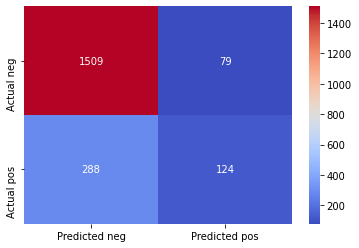

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
confusion_df=pd.DataFrame(cm,index=["Actual neg","Actual pos"],columns=["Predicted neg","Predicted pos"])
sns.heatmap(confusion_df,cmap="coolwarm",annot=True,fmt="2.0f")

**7. Deploy the model**

In [96]:
Xnew=np.array([[850,0,43,2,1,1,1,79084.10]])
predictions=model.predict_classes(Xnew)
predictions

array([[0]], dtype=int32)

The model has accuracy of 0.8165
